# Tarea Final de Inteligencia Artificial

Benjamin Rivera

## Red Neuronal

Objetivo:  entrenar  una  red  neuronal  tipo  perceptrón  multicapas  que  aprenda  a  clasificar correctamente un conjunto de datos.  Luego de entrenar hasta conseguir un  error  de  entrenamiento    cercano  a  cero,  vamos  a  comprobar  qué  tan  bien funciona la red midiendo el error de validación. 

In [66]:
import numpy as np
import random
import matplotlib.pyplot as plt

### Implementacion de Red Neuronal (Previo)

In [173]:
# Funciones de Activacion 
def identity(x):
    return x

def identity_derivada(x):
    return 1

def relu(x):
    return 0 if np.all(x <= 0) else x

def relu_derivada(x):
    # Simplificacion para evitar errores.
    return 0 if np.all(x <= 0) else 1

def step(x):
    return 0 if x < 0 else 1

def step_derivada(x):
    # Simplificacion para evitar errores.
    return 0

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivada(x):
    return 1.0 - x**2


In [174]:
class NeuralNetwork:
    """ Clase para generalizar redes neuronales feedforward.
    
    Esta clase tiene como objetivo la generalizacion de las redes neurona_
    les feedforward. Esta generalizacion no permite hacer modificaciones 
    a la estructura estandar donde todos los nodos (a exepcion de los de 
    salida) se comportan como perceptrones conectados a las siguientes 
    capas.
    
    Se tiene un unico constructor que inicializa todo como se pide
    """

    def __init__(self, layers, activation='tanh', w_range = (-1,1)):
        # Verificacion de datos de entrada
        if activation not in ['sigmoid', 'tanh', 'relu', 'step', 'identity']:
            raise Exception("Funcion de activacion no reconocida. ")
        if w_range[0] >= w_range[1]:
            raise Exception("Error en el rango de los pesos. ")
        
        # Seleccion de funcion de activacion
        if activation == 'relu':
            self.activation = relu
            self.activation_prime = relu_derivada
        elif activation == 'step':
            self.activaition = step
            self.activation_prime = step_derivada
        elif activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_derivada
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_derivada
        elif activation == 'identity':
            self.activation = identity
            self.activation_prime = identity_derivada

        # Inicializacion de pesos
        self.weights = []
        self.deltas = []
        # valores aleatorios a pesos de entrada y capa oculta
        for i in range(1, len(layers) - 1):
            r = np.random.uniform(w_range[0], w_range[1], (layers[i-1] + 1, layers[i] + 1))
            self.weights.append(r)
        # valores aleatorios a capa de salida
        r = np.random.uniform(w_range[0], w_range[1], (layers[i] + 1, layers[i+1]))
        self.weights.append(r)


    def fit(self, X, y, learning_rate=0.1, epochs=100000, with_bias=False):
        """ Funcion para realizar la aproximacion del modelo a los datos dados.
        
        Esta funcion trata de ajustar los pesos de la red (backpropagation) para
        que se ajuste a los datos dados. Permite que se ajuste el "ratio de 
        aprendizaje" y la cantidad de iteraciones para el entrenamiento.
        
        Input:
            X := Datos de la capa de entrada
            y := Datos esperados en la capa de salida
            learning_rate := Ratio de aprendizaje del modelo
            epochs := Cantidad de iteraciones para el modelo
        """

        # Agregamos bias si no lo tiene ya
        if not with_bias:
            ones = np.atleast_2d(np.ones(X.shape[0]))
            X = np.concatenate((ones.T, X), axis=1)
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)

            # Calculo del error en el modelo
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]
            
            # Calculamos los deltas
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))
            self.deltas.append(deltas)
            deltas.reverse()

            # backpropagation
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: print('epochs:', k)

    def evaluate(self, x):
        """ Funcion para evaluar una entrada en la red. """
        
        ones = np.atleast_2d(np.ones(x.shape[0]))
        a = np.concatenate((np.ones(1).T, np.array(x)), axis=0)
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
            
        return a
            
    def set_weights(self, w):
        """ Funcion establecer ciertos pesos. """
        try:
            if w.shape == self.weights.shape:
                self.weights = w
        except AttributeError as e:
            print("Los pesos se mantienen. ")
            print(e)
    
    # Getters
    def get_weights(self):
        return self.weights

    def get_deltas(self):
        return self.deltas

In [175]:
def fast_training(X, y, hiden_layers=[3], epochs=15000, learning_rate=0.02, activation='identity', with_bias=False):
    """ Implementacion simplificada. Regresa la red para hacer mas pruebas. """
    if with_bias:
        layers = [len(X[0])-1, len(y[0])]
    else:
        layers = [len(X[0]), len(y[0])]
        
    for lay in hiden_layers:
        layers.insert(-1, lay)

    nn = NeuralNetwork(layers, activation=activation)
    nn.fit(X, y, learning_rate=learning_rate, epochs=epochs, with_bias=with_bias)

    for i in range(0, len(X), 9):
        print("X:", X[i], "y:", y[i], "\n\tAproximacion: ", nn.evaluate(X[i]))
        
    return nn

### Paso 1. 
Generar aleatoriamiente 100 muestras, 50 de la clase positiva y 50 de la clase negativa.  Cada muestra vive en dos dimensiones $(X1, X2)$ y tiene su etiqueta $Y$ que vale $1$ si la muestra es positiva, $0$ si es negativa. Entonces el conjunto de muestras son ternas $(X1,X2,Y)$.

(Esto se debe trabajar junto co el paso 5)

#### Paso 5

La muestras positivas están delimitadas por las rectas $X=1, X=5, Y=2, Y=6$

In [176]:
# Limites para la clase 1
pos_x_min = 1.0
pos_x_max = 5.0
pos_y_min = 2.0
pos_y_max = 6.0
# Limites para la clase 0
neg_x_min = 5.0
neg_x_max = 9.0
neg_y_min = 6.0
neg_y_max = 9.0
# Tamanios de clases
sz_clase = 50

# Clase 1
X = np.random.uniform(pos_x_min, pos_x_max, (sz_clase, 1))
Y = np.random.uniform(pos_y_min, pos_y_max, (sz_clase, 1))
clase = np.atleast_2d(np.ones(X.shape[0]))
clase1 = np.concatenate((clase.T, X, Y), axis=1)

# Clase 0
X = np.random.uniform(neg_x_min, neg_x_max, (sz_clase, 1))
Y = np.random.uniform(neg_y_min, neg_y_max, (sz_clase, 1))
clase = np.atleast_2d(np.zeros(X.shape[0]))
clase0 = np.concatenate((clase.T, X, Y), axis=1)

### Paso 2

Tomar aleatoriamente 80 muestras, ese será el conjunto de entrenamiento. Las otras 20 son el conjunto de prueba.Pero procurar que hayan 40 positivas y 40 negativas, así como también 10 positivas y 10 negativas. Sin repetición.

In [177]:
# Obtenemos indices aleatorios para cada clase
#(se podria usar el mismo para ambos).
ch_clase1 = random.sample(range(sz_clase), sz_clase)
ch_clase0 = random.sample(range(sz_clase), sz_clase)

training_set = []
test_set = []
for i in range(sz_clase):
    # Primero tomamos el de prueba
    if i < 10:
        test_set.append(clase1[ch_clase1[i]])
        test_set.append(clase0[ch_clase0[i]])
    else:
        training_set.append(clase1[ch_clase1[i]])
        training_set.append(clase0[ch_clase0[i]])
        
# Para comodidad
training_set = np.array(training_set)
test_set = np.array(test_set)

### Paso 3

Obtener dos redes con mínimo error de entrenamiento, y reportar el conjunto de pesos de la solución.  Mostrar las ecuaciones de las rectas que genera cada uno de los nodos del Perceptrón (utilizando los pesos y el bias).

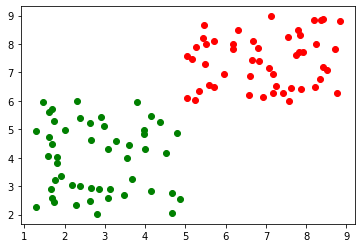

In [187]:
x_min = 0.0
x_max = 10.0
y_min = 0.0
y_max = 10.0

buenos = clase1[:, 1:]
malos = clase0[:, 1:]

plt.plot(buenos[:, 0], buenos[:, 1], 'go')
plt.plot(malos[:, 0], malos[:, 1], 'ro')

#### Red 1

In [194]:
nn1 = fast_training(training_set[:, 1:], training_set[:, 0:1], hiden_layers=[2,2], epochs=70001, activation='tanh')

print('\nPesos:\n')
for w in nn1.get_weights():
    print(w)

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
X: [2.17865624 3.05341973] y: [1.] 
	Aproximacion:  [0.9983784]
X: [7.86948967 6.41085691] y: [0.] 
	Aproximacion:  [-0.02142919]
X: [3.58852884 4.45174689] y: [1.] 
	Aproximacion:  [0.99527414]
X: [7.84020657 8.32714238] y: [0.] 
	Aproximacion:  [-0.02557766]
X: [1.58341219 4.05182444] y: [1.] 
	Aproximacion:  [0.99840737]
X: [5.48711015 7.30757957] y: [0.] 
	Aproximacion:  [0.00436285]
X: [4.35820568 5.24378083] y: [1.] 
	Aproximacion:  [0.62653421]
X: [6.18168175 8.00212487] y: [0.] 
	Aproximacion:  [-0.01836175]
X: [1.45941106 5.96071583] y: [1.] 
	Aproximacion:  [0.99844708]

Pesos:

[[-3.50973551e+00  3.76880403e-04 -7.97165898e-01]
 [ 5.22570741e-01 -2.91189788e-01 -3.35444317e-01]
 [ 4.10991032e-01 -9.42273003e-01 -5.00701479e-01]]
[[ 2.42666206  0.6654714  -0.17341966]
 [ 0.78168601 -0.65077532 -1.01909836]
 [ 0.50415257 -0.8653251  -0.18747264]]
[[-2.04763863]
 [ 0.9542

#### Red 2

In [195]:
nn2 = fast_training(training_set[:, 1:], training_set[:, 0:1], hiden_layers=[3], epochs=40001, activation='tanh')

print('\nPesos:\n')
for w in nn2.get_weights():
    print(w)

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
X: [2.17865624 3.05341973] y: [1.] 
	Aproximacion:  [0.99968129]
X: [7.86948967 6.41085691] y: [0.] 
	Aproximacion:  [-0.03040071]
X: [3.58852884 4.45174689] y: [1.] 
	Aproximacion:  [0.98760154]
X: [7.84020657 8.32714238] y: [0.] 
	Aproximacion:  [-0.04279695]
X: [1.58341219 4.05182444] y: [1.] 
	Aproximacion:  [0.99966338]
X: [5.48711015 7.30757957] y: [0.] 
	Aproximacion:  [0.05464558]
X: [4.35820568 5.24378083] y: [1.] 
	Aproximacion:  [0.78902491]
X: [6.18168175 8.00212487] y: [0.] 
	Aproximacion:  [-0.01647885]
X: [1.45941106 5.96071583] y: [1.] 
	Aproximacion:  [0.99872805]

Pesos:

[[-0.54759375  1.01259052  0.37719711 -3.5334388 ]
 [-0.94263264  0.16223079  0.30725672  0.51600119]
 [-0.52688217  0.55322847  0.97892963  0.35730019]]
[[-0.77248252]
 [ 1.17711398]
 [ 0.37416819]
 [-2.37101569]]


### Paso 4

Para cada red determinar el error de validación. Para esto se presentan las muestras del conjunto de validación y se determina el error de cada muestra, y se reporta el promedio de muestras bien clasificadas entre el total de muestras.

In [209]:
out_hope = test_set[:, 0:1]
input_nn = test_set[:, 1:]

def validacion(nn, out_hope, input_nn, tolerancia=0.01):
    test_out = [nn.evaluate(x) for x in input_nn]
    error_test = np.mean(abs(test_out - out_hope))
    print(f"El error promedio obtenido en la red es {error_test}")

    tot = 0
    for prb, crrc in zip(test_out, out_hope):
        if abs(prb - crrc) < tolerancia:
            print(f"\tNn:{prb} Datos:{crrc} (bien clasificada)")
            tot += 1

    print(f"Clasificamos {tot} bien; esto representa un {tot*100/len(out_hope)}%")

In [210]:
validacion(nn1, out_hope, input_nn)

El error promedio obtenido de la primer red es 0.027941013014348447
	Nn:[0.9984123] Datos:[1.] (bien clasificada)
	Nn:[0.99840059] Datos:[1.] (bien clasificada)
	Nn:[0.99850037] Datos:[1.] (bien clasificada)
	Nn:[-0.00277411] Datos:[0.] (bien clasificada)
	Nn:[0.99606563] Datos:[1.] (bien clasificada)
	Nn:[0.99846917] Datos:[1.] (bien clasificada)
	Nn:[0.99831303] Datos:[1.] (bien clasificada)
	Nn:[0.9984507] Datos:[1.] (bien clasificada)
	Nn:[0.99625392] Datos:[1.] (bien clasificada)
	Nn:[0.99768475] Datos:[1.] (bien clasificada)
Clasificamos 10 bien; esto representa un 50.0%


In [211]:
validacion(nn2, out_hope, input_nn)

El error promedio obtenido de la primer red es 0.02735802065161755
	Nn:[0.99964804] Datos:[1.] (bien clasificada)
	Nn:[0.99758137] Datos:[1.] (bien clasificada)
	Nn:[0.99904444] Datos:[1.] (bien clasificada)
	Nn:[-0.00121823] Datos:[0.] (bien clasificada)
	Nn:[0.99260396] Datos:[1.] (bien clasificada)
	Nn:[0.9995285] Datos:[1.] (bien clasificada)
	Nn:[0.99973629] Datos:[1.] (bien clasificada)
	Nn:[0.99950672] Datos:[1.] (bien clasificada)
	Nn:[-0.00714227] Datos:[0.] (bien clasificada)
	Nn:[0.99146774] Datos:[1.] (bien clasificada)
	Nn:[-0.00277877] Datos:[0.] (bien clasificada)
	Nn:[0.99545891] Datos:[1.] (bien clasificada)
Clasificamos 12 bien; esto representa un 60.0%


## Imposible $4*4$ con A\*

Trabajando ...